In [18]:
import glob
import torch, detectron2

# import some common libraries
import numpy as np
import os, json, cv2, random
from PIL import Image
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

: 

In [6]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_2d9806.pkl: 431MB [00:01, 263MB/s]                             


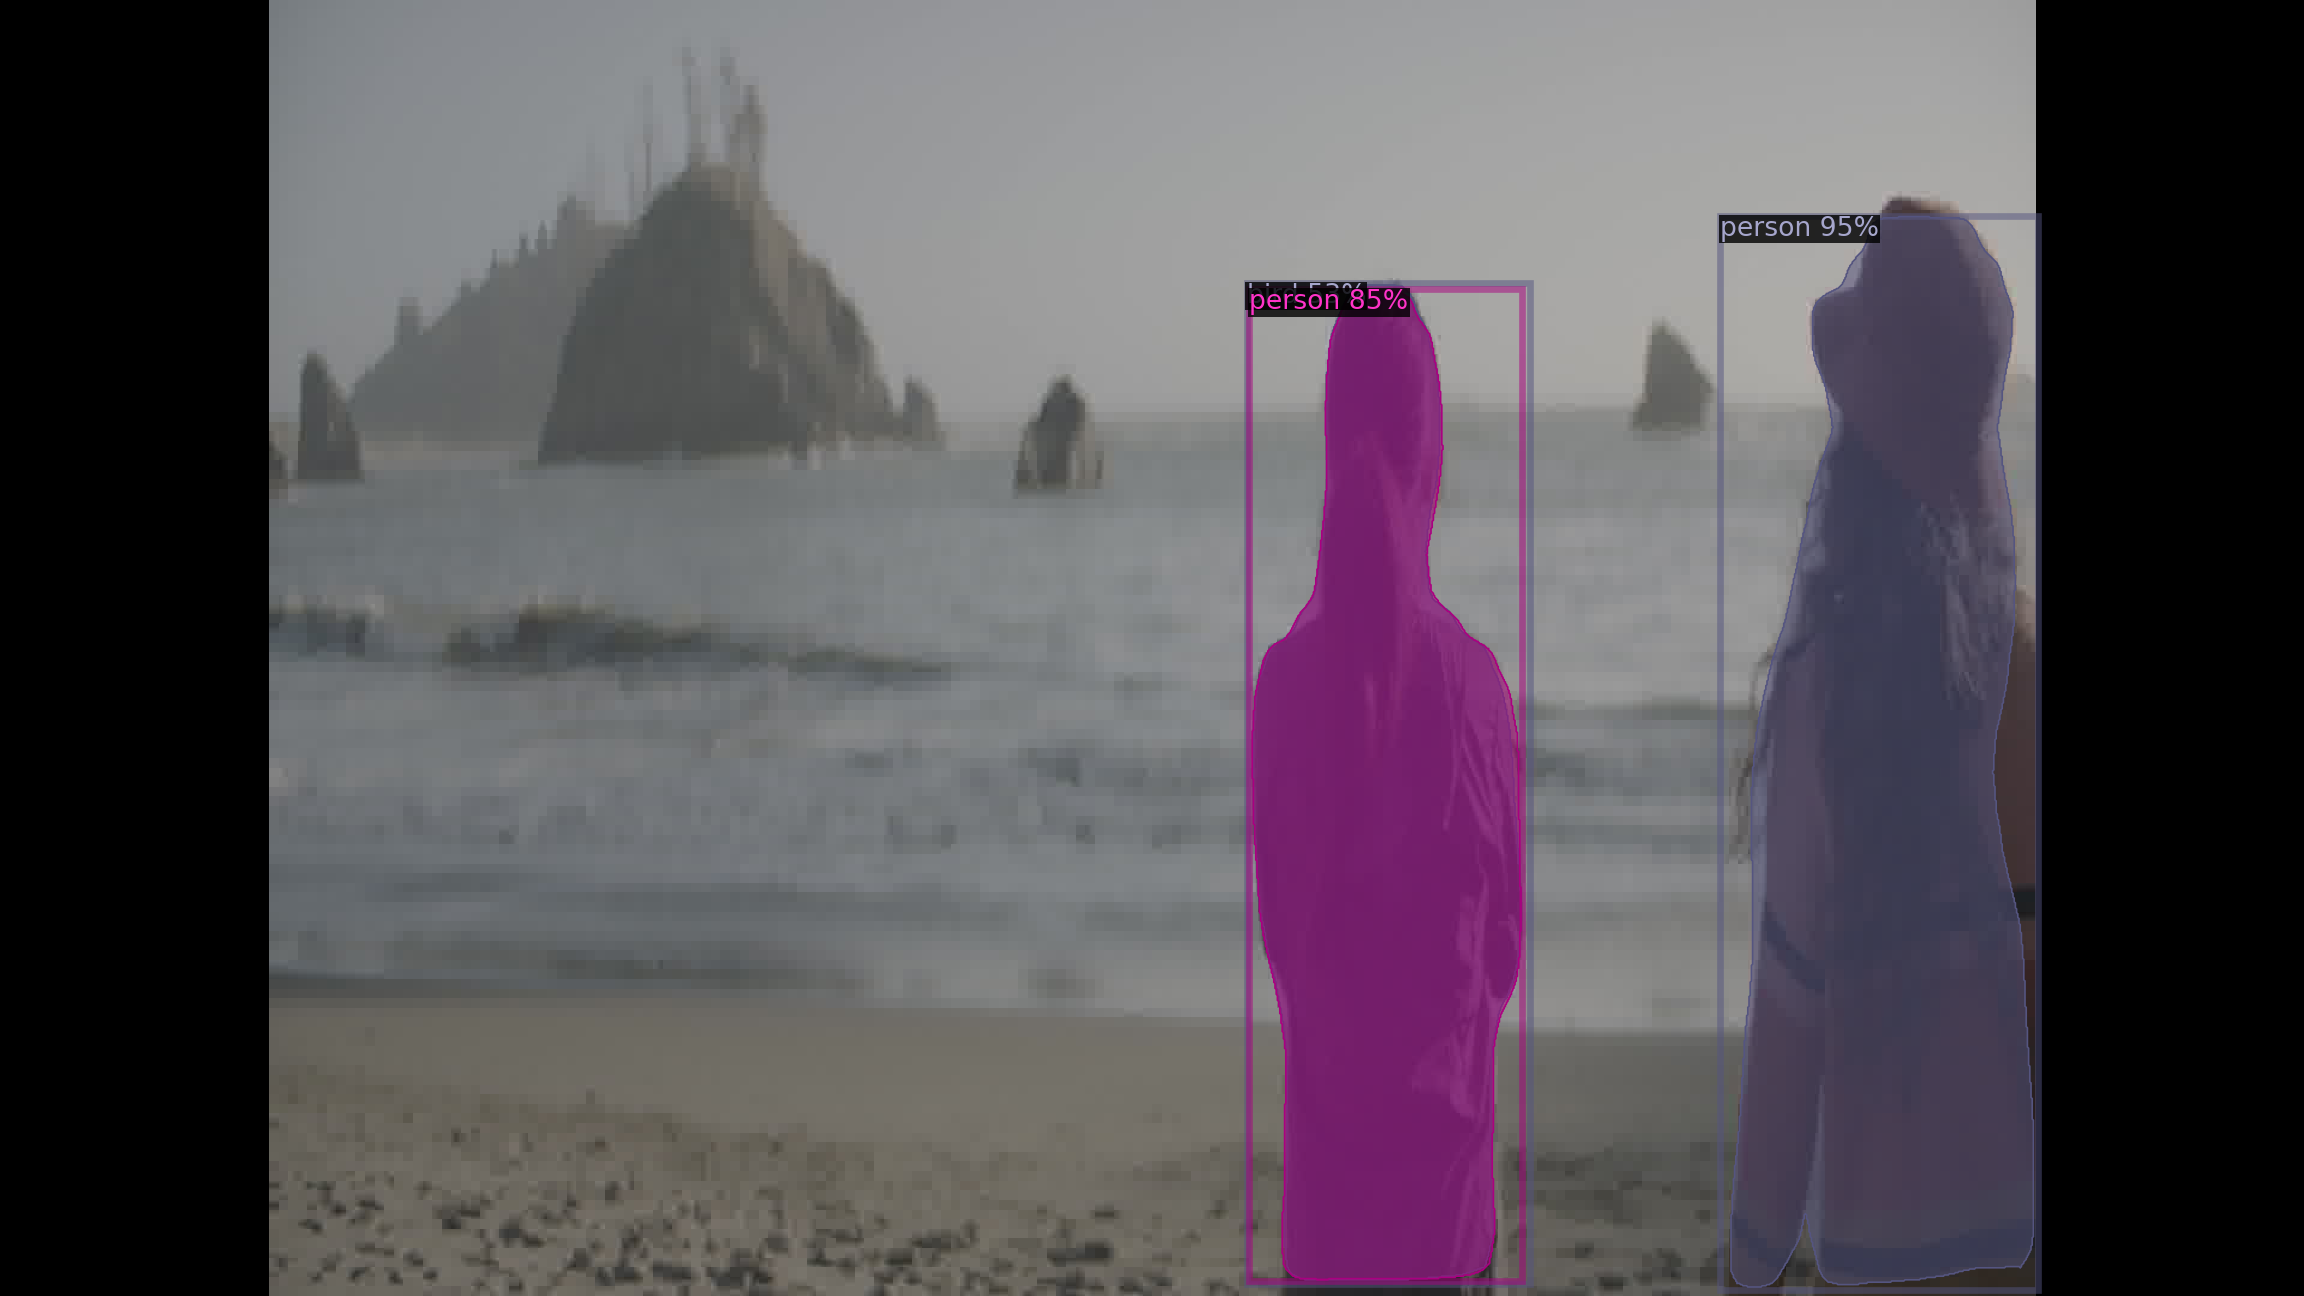

In [7]:
image_path = "/mnt/localssd/frame.io/images/Arcata_V1-0004/00028.jpg"
img = cv2.imread(image_path)
outputs = predictor(img)
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
Image.fromarray(out.get_image())

In [17]:
# Save mask
mask_id = 0
for id in range(len(outputs['instances'])):
    ins = outputs['instances'][id]
    category_id = ins.get('pred_classes').to('cpu').numpy()[0]
    if category_id != 0:
        continue
    mask = ins.get('pred_masks').to('cpu').numpy()[0]
    mask = np.array(mask * 255, dtype=np.uint8)
    mask = Image.fromarray(mask)
    mask.save(f'mask_{mask_id}.png')
    mask_id += 1

In [ ]:
video_path = "/mnt/localssd/frame.io/images/Arcata_V1-0004"
image_paths = glob.glob(video_path + '/*.jpg')
image_paths.sort()
id2prevmask = {}
for image_path in image_paths:
    # Predict mask
    img = cv2.imread(image_path)
    outputs = predictor(img)
    
    # Match with prev mask